<a href="https://colab.research.google.com/github/mitunkantipaul/Image_processing/blob/main/zip_loading_visualizing_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data from a Remote Zip Directory

In [6]:
# geting data without any cirtificate check on server 
# -O : output file flag

# !wget --no-check-cirtificate [url] [-O] [/dir]

!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
-O /tmp/horse-or-human.zip             

--2020-11-21 15:01:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 108.177.111.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  56.0MB/s    in 2.5s    

2020-11-21 15:02:00 (56.0 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [7]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()


In [14]:
# dir of train horses
train_horses_dir = os.path.join('/tmp/horse-or-human/horses')

# dir of train humans
train_humans_dir = os.path.join('/tmp/horse-or-human/humans')

train_horse_names = os.listdir(train_horses_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_humans_dir)
print(train_human_names[:10])


['horse15-5.png', 'horse23-2.png', 'horse38-4.png', 'horse16-0.png', 'horse35-8.png', 'horse39-5.png', 'horse01-5.png', 'horse26-2.png', 'horse42-8.png', 'horse14-3.png']
['human05-30.png', 'human15-00.png', 'human08-26.png', 'human04-04.png', 'human16-13.png', 'human02-08.png', 'human17-25.png', 'human03-10.png', 'human11-12.png', 'human15-17.png']


In [16]:
print('total training horse images:', len(os.listdir(train_horses_dir)))
print('total training human images:', len(os.listdir(train_humans_dir)))

total training horse images: 500
total training human images: 527


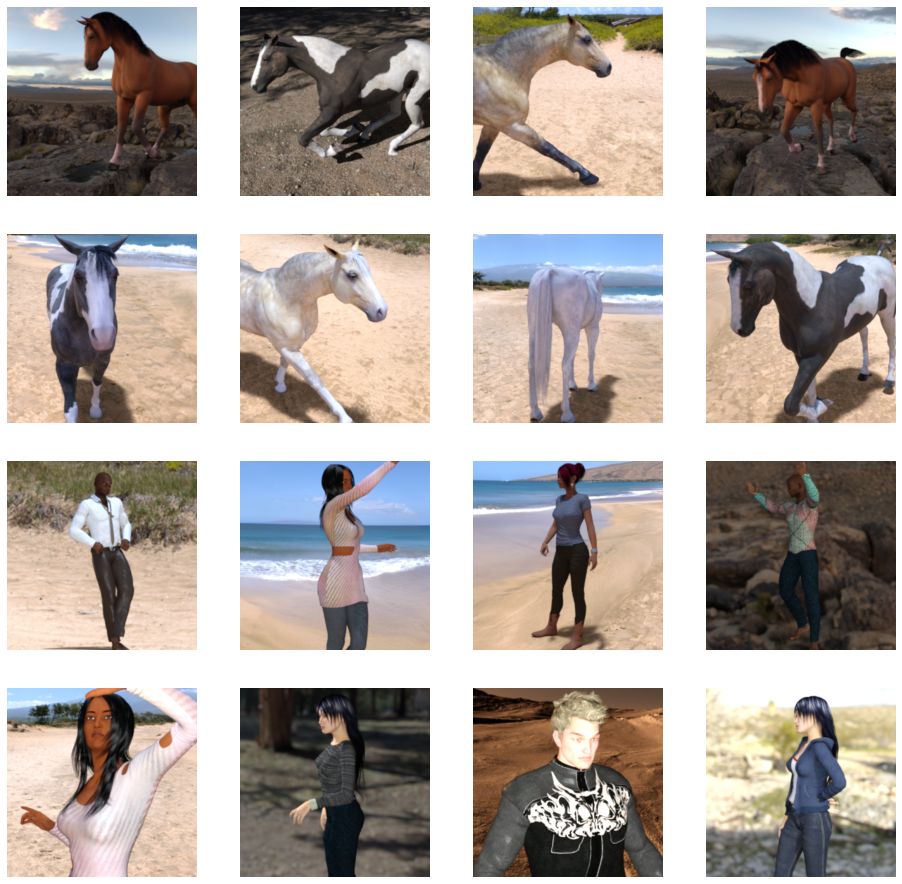

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horses_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_humans_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()